# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kedrovyy
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | chagda
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hami
Processing Record 7 of Set 1 | shache
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | puerto narino
Processing Record 14 of Set 1 | kerman
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | lelydorp
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | berlevag
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | wodonga
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing R

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kedrovyy,56.1667,91.8167,-12.77,98,100,0.79,RU,1675504501
1,lebu,-37.6167,-73.6500,14.30,88,1,0.66,CL,1675504501
2,yellowknife,62.4560,-114.3525,-25.71,76,100,3.09,CA,1675504502
3,busselton,-33.6500,115.3333,30.53,30,10,6.02,AU,1675504503
4,hami,42.8000,93.4500,0.92,35,9,1.54,CN,1675504504


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kedrovyy,56.1667,91.8167,-12.77,98,100,0.79,RU,1675504501
1,lebu,-37.6167,-73.6500,14.30,88,1,0.66,CL,1675504501
2,yellowknife,62.4560,-114.3525,-25.71,76,100,3.09,CA,1675504502
3,busselton,-33.6500,115.3333,30.53,30,10,6.02,AU,1675504503
4,hami,42.8000,93.4500,0.92,35,9,1.54,CN,1675504504


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

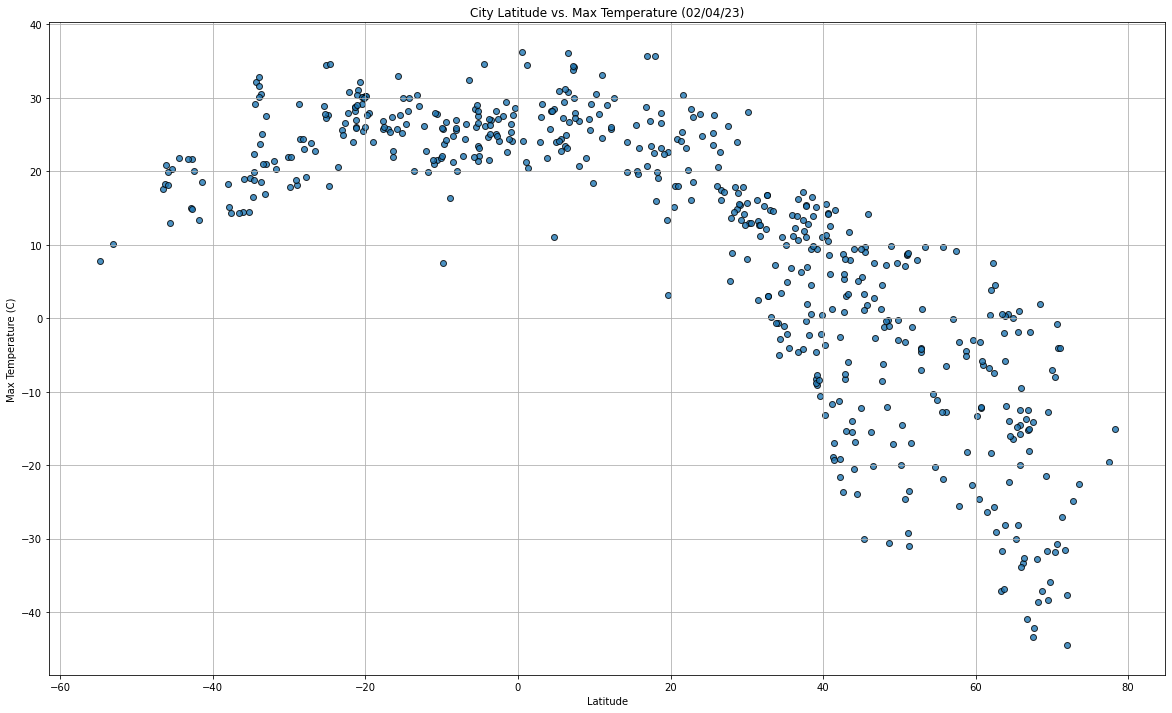

In [26]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.figure(figsize=(20,12))
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

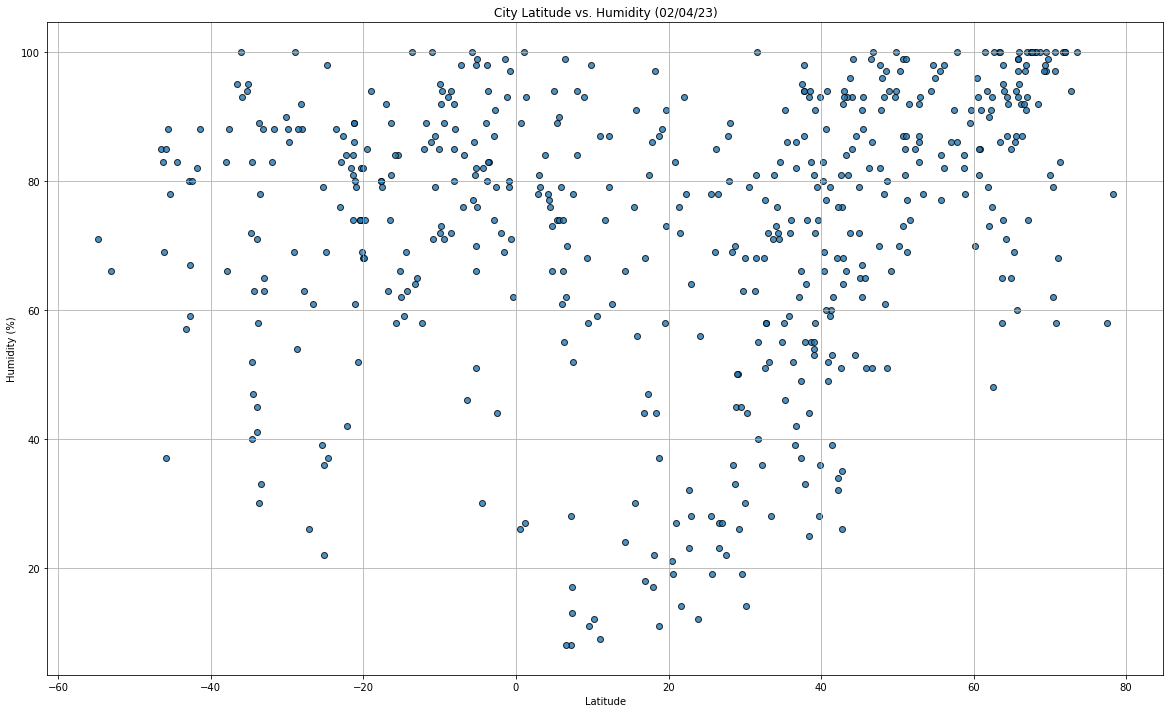

In [27]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.figure(figsize=(20,12))
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

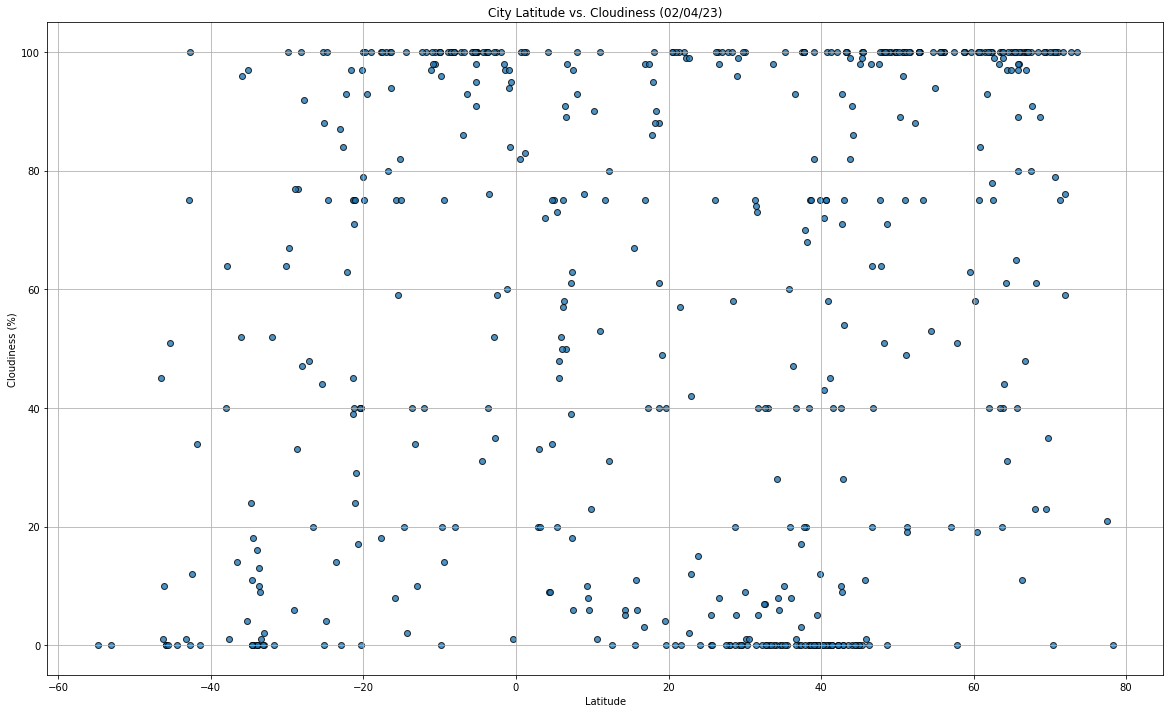

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.figure(figsize=(20,12))
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

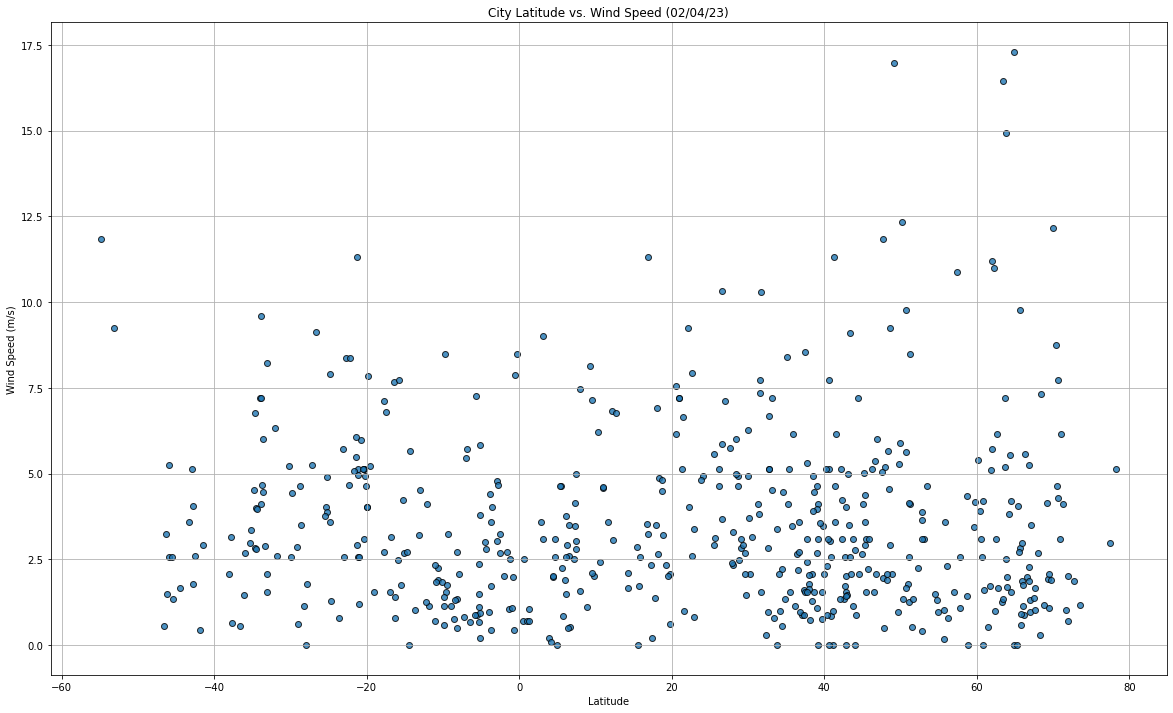

In [29]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.figure(figsize=(20,12))
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    
    # Linregress function for x and y values
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Create equation of line to calculate predicted y values
    regress_values = x_values * slope + intercept

    # Get line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot regression line
    plt.figure(figsize=(20,12))
    plt.annotate(line_eq, (x,y), fontsize=24, color="red")
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    
    # Print r square value
    print(f"The r-value is: {r_value**2}")
    



In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kedrovyy,56.1667,91.8167,-12.77,98,100,0.79,RU,1675504501
2,yellowknife,62.4560,-114.3525,-25.71,76,100,3.09,CA,1675504502
4,hami,42.8000,93.4500,0.92,35,9,1.54,CN,1675504504
5,shache,38.4167,77.2406,4.58,44,0,1.30,CN,1675504505
6,qaanaaq,77.4840,-69.3632,-19.59,58,21,2.98,GL,1675504505


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,14.30,88,1,0.66,CL,1675504501
3,busselton,-33.6500,115.3333,30.53,30,10,6.02,AU,1675504503
7,vaini,-21.2000,-175.2000,26.09,89,75,2.57,TO,1675504506
8,te anau,-45.4167,167.7167,20.27,78,51,1.36,NZ,1675504506
9,bluff,-46.6000,168.3333,17.57,85,45,0.55,NZ,1675504507


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6976394759478537


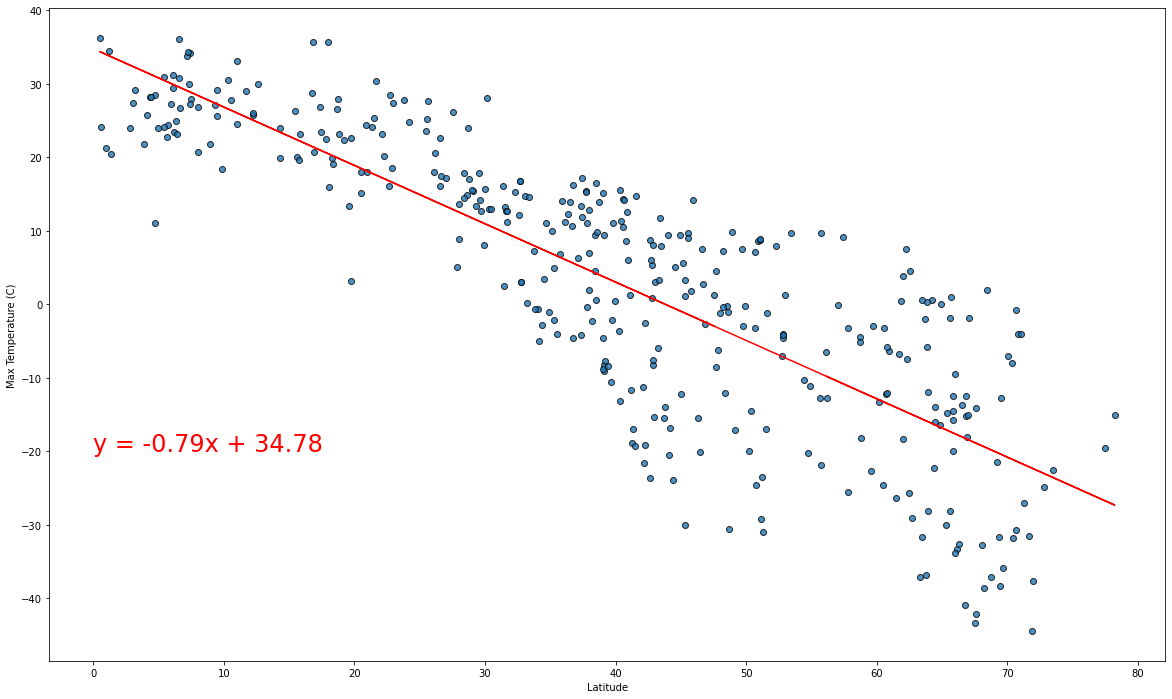

In [56]:
# Linear regression on Northern Hemisphere
# Set x and y values for annotation position
x = 0
y = -20
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig5.png")
plt.show()

The r-value is: 0.20200281831769798


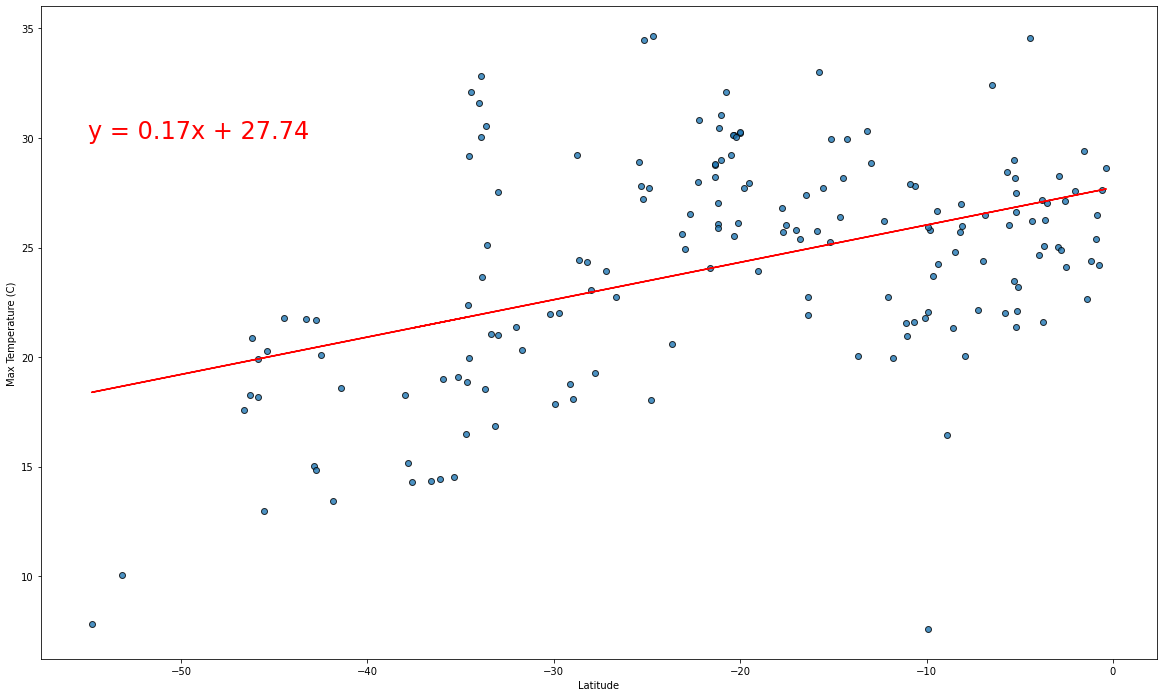

In [58]:
# Linear regression on Southern Hemisphere
# Set x and y values for annotation position
x = -55
y = 30
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** The linear regression model shows a strong negative correlation between temperature and latitude in the northern hemisphere and a strong positive correlation in the southern hemisphere. Both suggesting that the closer to zero(aka-the equator), the higher the temperature. The further away from zero, the lower the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20074594152186176


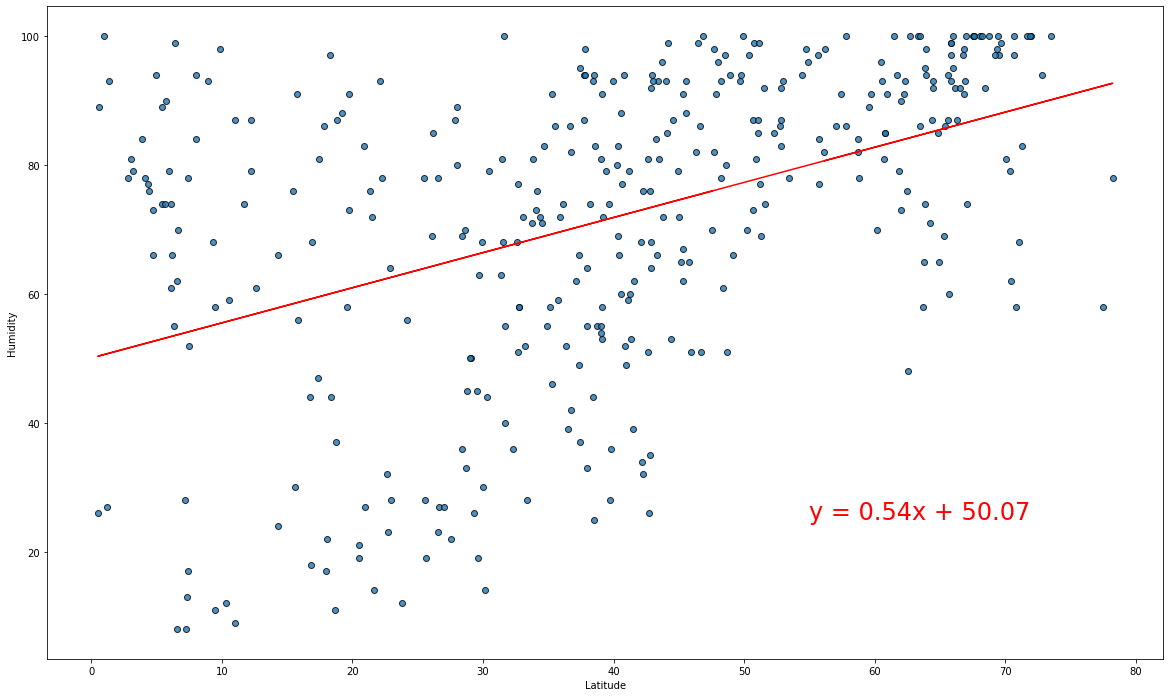

In [66]:
# Northern Hemisphere
# Set x and y values for annotation position
x = 55
y = 25
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.033007874027864675


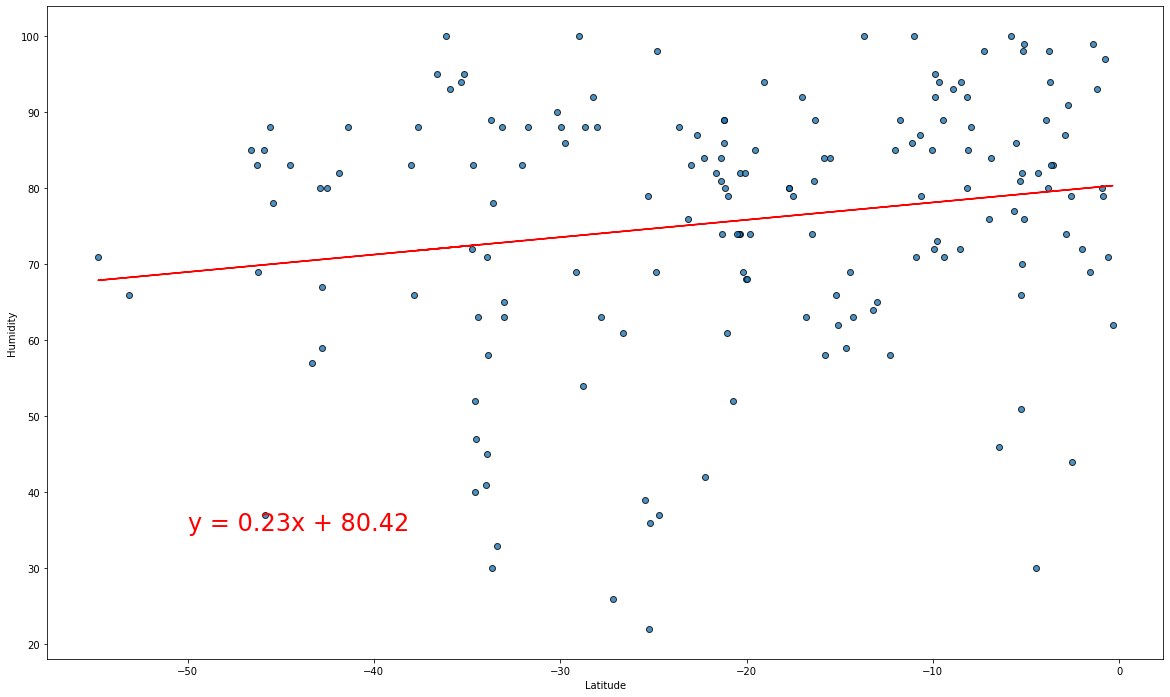

In [70]:
# Southern Hemisphere
# Set x and y values for annotation position
x = -50
y = 35
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** The linear regression model shows a weak positive correlation between humidity and latitude, meaning that the further away from zero, the higher the humidity. However, the correlation is not strong enough to be considered a linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06964200696618408


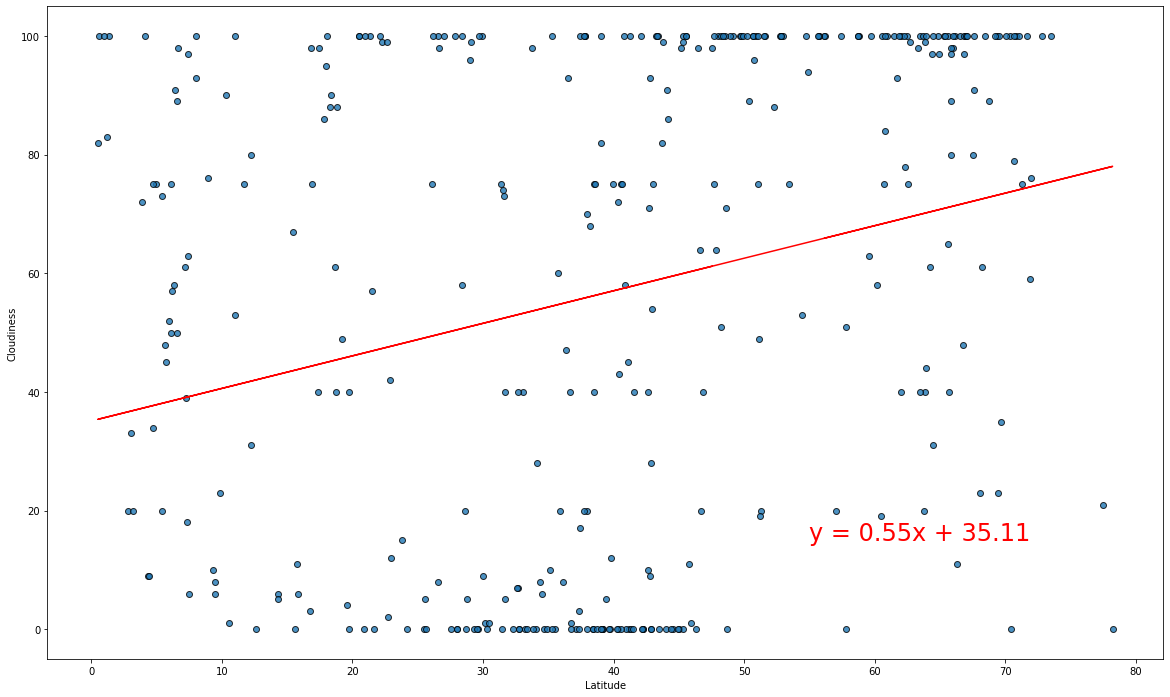

In [68]:
# Northern Hemisphere
# Set x and y values for annotation position
x = 55
y = 15
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.34325212198438104


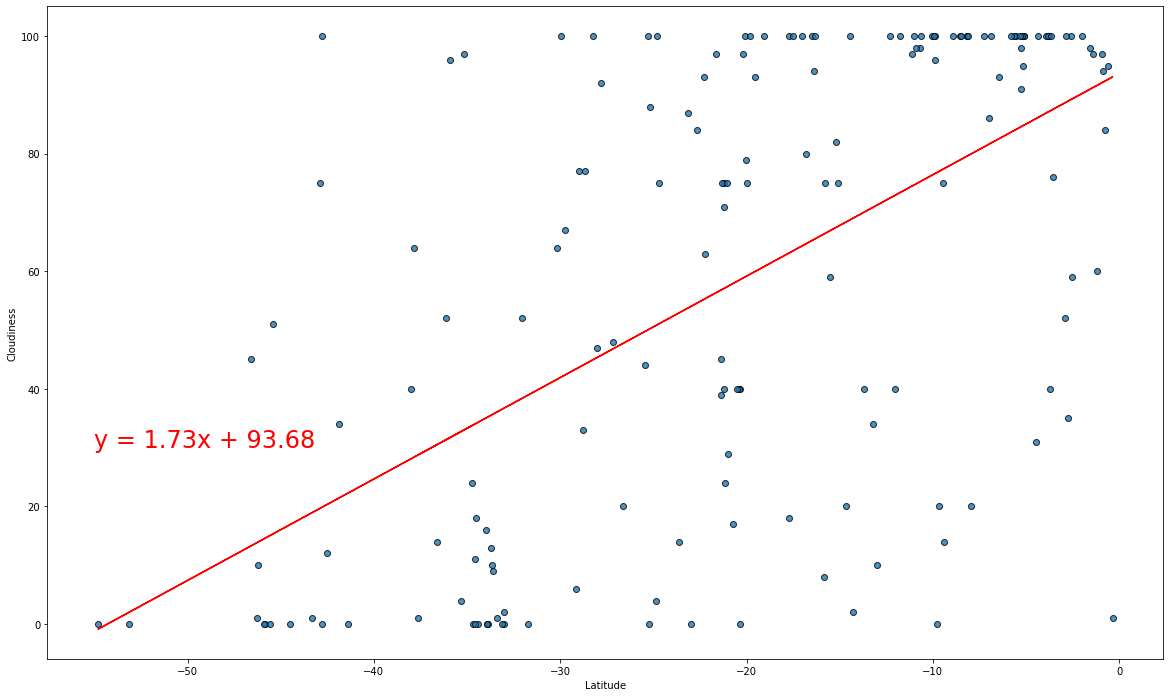

In [69]:
# Southern Hemisphere
# Set x and y values for annotation position
x = -55
y = 30
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** The linear regression model shows a weak positive correlation between cloudiness and latitude, meaning that the further away from zero, the higher the cloudiness. However, the correlation is not strong enough to be considered a linear relationship. The regression model also shows that the data is not normally distributed, and appears to be inconsistent when selecting new random samples.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0010732245133869332


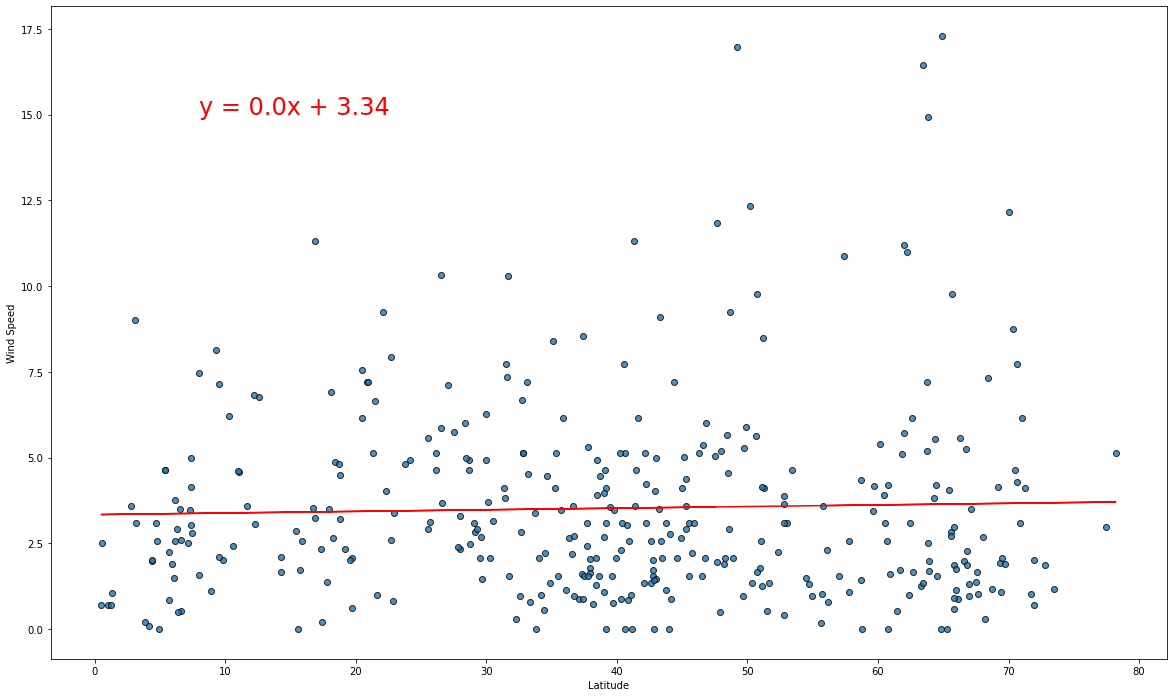

In [73]:
# Northern Hemisphere
# Set x and y values for annotation position
x = 8
y = 15
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig11.png")
plt.show()

The r-value is: 0.040209322908284176


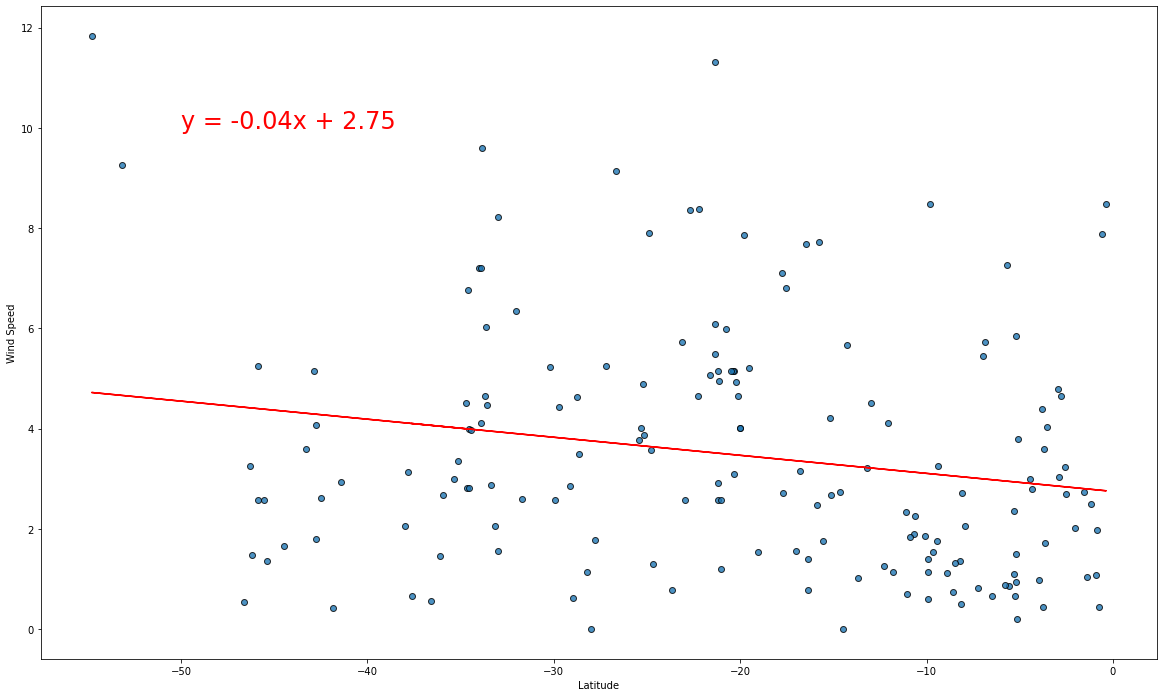

In [75]:
# Southern Hemisphere
# Set x and y values for annotation position
x = -50
y = 10
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** The Linear regression model shows no correlation between wind speed and latitude.